In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ikanhias/Ikan/val/Guppy/38.jpg
/kaggle/input/ikanhias/Ikan/val/Guppy/33.jpg
/kaggle/input/ikanhias/Ikan/val/Guppy/IMG_20200519_213205.jpg
/kaggle/input/ikanhias/Ikan/val/Guppy/2.jpg
/kaggle/input/ikanhias/Ikan/val/Guppy/IMG_20200519_213028.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000105.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000054.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000008.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000125.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000102.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000064.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000114.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000081.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000130.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000051.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000108.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000013.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000044.jpg
/kaggle/input/ikanhias/Ikan/val/Manfish/

In [2]:
import os
import logging
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.applications.inception_v3 import InceptionV3



/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
training_dir = "/kaggle/input/ikanhias/Ikan/train"
validation_dir = "/kaggle/input/ikanhias/Ikan/val"
testing_dir = "/kaggle/input/ikanhias/Ikan/test"

In [4]:

pre_train_model = tf.keras.applications.inception_v3.InceptionV3(
    input_shape=(150, 150, 3), include_top=False, weights="imagenet"
)

87910968/87910968 [==============================] - 0s 0us/step


In [5]:
for layer in pre_train_model.layers:
    layer.trainable = False

In [6]:

x = layers.Flatten()(pre_train_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(11, activation='softmax')(x)

model = Model(pre_train_model.input, x) 

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	training_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=32
)

validation_generator = validation_datagen.flow_from_directory(
	validation_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=32
)
testing_datagen = ImageDataGenerator(rescale = 1./255)

testing_generator = testing_datagen.flow_from_directory(
    testing_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=32)

Found 956 images belonging to 11 classes.
Found 116 images belonging to 11 classes.
Found 129 images belonging to 11 classes.


In [9]:
epochs = 20

# Melakukan pelatihan model
history = model.fit(
    train_generator,
    validation_data= validation_generator,
    epochs=epochs
)

Epoch 1/20
30/30 [==============================] - 40s 828ms/step - loss: 15.6182 - accuracy: 0.2374 - val_loss: 1.8266 - val_accuracy: 0.3966
Epoch 2/20
30/30 [==============================] - 16s 533ms/step - loss: 1.9562 - accuracy: 0.3222 - val_loss: 1.6326 - val_accuracy: 0.4741
Epoch 3/20
30/30 [==============================] - 15s 505ms/step - loss: 1.8357 - accuracy: 0.3556 - val_loss: 1.6031 - val_accuracy: 0.5431
Epoch 4/20
30/30 [==============================] - 15s 511ms/step - loss: 1.7976 - accuracy: 0.3818 - val_loss: 1.5578 - val_accuracy: 0.5603
Epoch 5/20
30/30 [==============================] - 16s 536ms/step - loss: 1.6998 - accuracy: 0.4236 - val_loss: 1.3968 - val_accuracy: 0.5259
Epoch 6/20
30/30 [==============================] - 16s 534ms/step - loss: 1.7179 - accuracy: 0.4017 - val_loss: 1.4571 - val_accuracy: 0.5086
Epoch 7/20
30/30 [==============================] - 16s 550ms/step - loss: 1.7184 - accuracy: 0.4017 - val_loss: 1.4609 - val_accuracy: 0.551

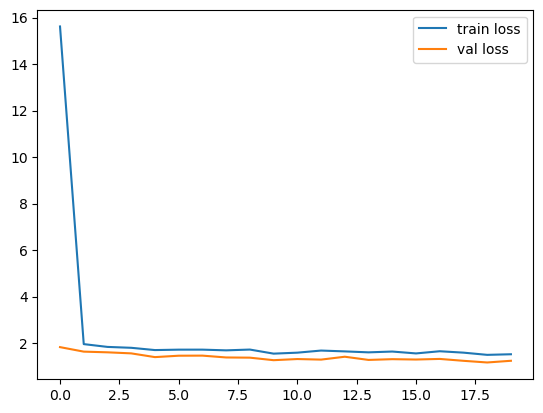

In [10]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

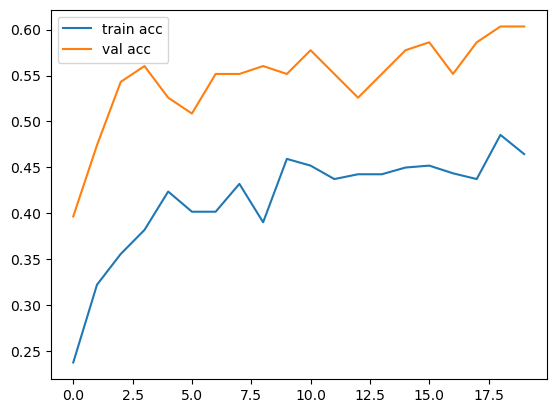

In [11]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()